# Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#....*...*..*.*.*..*...*....#

import numpy as np
import matplotlib.pyplot as plt
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from PIL import Image

import time
import os

#....*...*..*.*.*..*...*....#

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Mounted at /content/drive
Using PyTorch version: 2.1.0+cu121  Device: cuda


# Open and Process Data

In [ ]:
current = '/content/drive/MyDrive/dlmathon'
path = current+'/data_uglyturtle'
train_path = path+'/train'
test_path = path+'/test'

In [ ]:
#############################
## ----> Input valset:(T/F)##
#############################
valset = False

train_name_list = os.listdir(train_path)
length = len(train_name_list)
val_path = path+'/val'
# os.mkdir(val_path)

if valset == True:
    frac = round(0.1*length)
    for i in train_name_list[:frac]:
        os.rename(train_path+i,val_path+i)

### Show a sample image

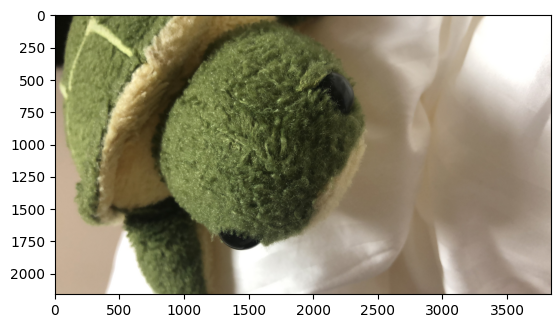

In [ ]:
liszt = []
for i in os.listdir(train_path):
    if os.path.isdir(train_path+'/'+i) == True:
        liszt.append(i)
num_classes = len(liszt)
lisztjr = os.listdir(train_path+'/'+liszt[0])
img = Image.open(train_path+'/'+liszt[0]+'/'+lisztjr[0])
plt.imshow(img)
plt.xlabel('ugly turtle')

https://www.projectpro.io/recipes/convert-image-tensor-pytorch


In [ ]:

# Open HEIF or HEIC file
image = Image.open('example.heic')

# Convert to JPEG
image.convert('RGB').save('example.jpg')

In [ ]:
def preprocess(train_path,BATCH_SIZE):

    transform_train = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor()
        ])

    # Load dataset
    train_dataset = datasets.ImageFolder(root=train_path, transform=transform_train)

    # Create DataLoader
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    return(train_dataset,train_loader)

# Prepare to Train.
## Set hyperparameters and stuff

In [ ]:
###############################################
## -----> Input Training Hyperparameters:    ##
###############################################

BATCH_SIZE = 30
EPOCHS = 10
loss = nn.CrossEntropyLoss()
learning_rate = 0.001

In [ ]:
train_dataset,train_loader = preprocess(train_path,BATCH_SIZE)

# Rudimentary CNN Model: ScheisseCNN

In [ ]:
class ScheisseCNN(nn.Module): # you always have to write (nn.Module) for it to work
    def __init__(self):
        super(ScheisseCNN,self).__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,stride=1,padding=0)
        self.conv2 = nn.Conv2d(16,32,kernel_size=3,stride=1,padding=0)
        self.fc1 = nn.Linear(32,128)
        self.outlayer = nn.Linear(128,num_classes)

        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1,
        # padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

    def forward(self,x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x,2)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.fc1(x)
        x = self.outlayer(x)
        x = nn.functional.softmax(x)
        return x

In [ ]:
model = ScheisseCNN()
model.cuda()
loss = loss
learning_rate = learning_rate
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

print(model)

ScheisseCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (outlayer): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
print(model)
# randomly initialized parameters
'''
for param in model.named_parameters(): # or just parameters, but in this case all params are named
    print(param[0])
    print(param)
'''

ScheisseCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (outlayer): Linear(in_features=128, out_features=5, bias=True)
)


'\nfor param in model.named_parameters(): # or just parameters, but in this case all params are named\n    print(param[0])\n    print(param)\n'

In [ ]:
plt.imshow(plt.imread('/content/drive/MyDrive/dlmathon/data_kfood/train/Rice/Img_069_0785.jpg'))

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/dlmathon/data_kfood/train/Rice/Img_069_0785.jpg'

# Begin Training

In [ ]:
def train(model,train_loader,optimizer,batch_size):
    model.train()

    losslist = []
    batch_loss_list = []
    correct = []
    batch_acc_list = []

    for index, (image,label) in enumerate(train_loader):
        image = image.to(DEVICE, dtype=torch.float)
        label = label.to(DEVICE)
        optimizer.zero_grad() #initialize optimizer
        output = model(image)
        loss = loss(output,label)
        loss.backward()
        optimizer.step()
        # this in itself updates the parameters!!
        print('output')
        print(output)

        losslist.append(loss.item)
        prediction = output.max(1, keepdim = True)[1]

        if output == label:
            correct.append(index)

        if index % batch_size == 0:
            batchnum = index/batch_size
            trainloss = sum(losslist)/len(losslist)
            batch_loss_list.append(trainloss)
            trainaccuracy = len(correct)/len(losslist)
            batch_acc_list.append(trainaccuracy)
            losslist = []
            correct = []

    return batch_loss_list, batch_acc_list

In [ ]:
def test(model,test_loader):
    model.eval()

    testloss = 0
    correct = 0



In [ ]:
def givetime(start_time,end_time):
    duration_seconds = end_time-start_time
    # Convert seconds to hours, minutes, and seconds
    hours, remainder = divmod(duration_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Print the duration in a human-readable format
    print(f"Epoch training duration: {int(hours)} hours, {int(minutes)} minutes, and {int(seconds)} seconds.")
    return duration_seconds

In [ ]:
# miscellany
timelist = []


# train and test loop
for epoch in range(EPOCHS):
    start_time = time.time()

    t = train(model,train_loader,optimizer,BATCH_SIZE)
    # this still calls the function, so the weight updates still happen.
    epochnum = epoch+1

    end_time = time.time()
    g = givetime(start_time,end_time)
    timelist.append(g)





# Plot Training Results

# Show correctly predicted images / outliers
If needed....

In [ ]:

BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

## shows the sample train_data
## 30 degree rotation!